In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC

## Dataset virus

In [2]:
df = pd.read_csv('../data/virus.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.shape

(400, 3)

In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

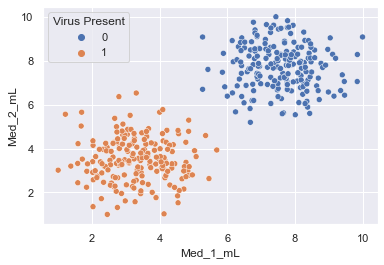

In [5]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

In [6]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
def plot_svm(model, X, y):
    X = X.values
    y = y.values

    model.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

def report_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("precision: ", precision_score(y_test, y_pred))
    print("recall (Sensitivity): ", recall_score(y_test, y_pred))
    print("recall (Specificity): ", recall_score(y_test, y_pred, pos_label=0))
    print("F1-score: ", f1_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

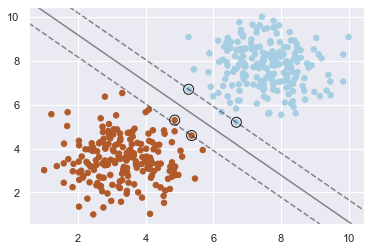

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
recall (Specificity):  1.0
F1-score:  1.0
AUC:  1.0


In [9]:
model = SVC(kernel='linear', C=1) # 'linear', 'poly', 'rbf'
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

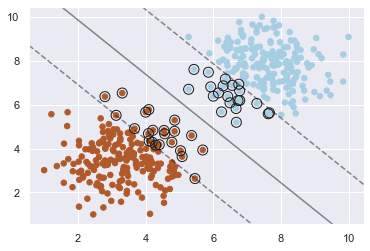

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
recall (Specificity):  1.0
F1-score:  1.0
AUC:  1.0


In [10]:
model = SVC(kernel='linear', C=0.01)
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

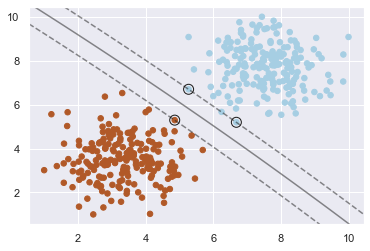

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
recall (Specificity):  1.0
F1-score:  1.0
AUC:  1.0


In [11]:
model = SVC(kernel='poly', degree=2)
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

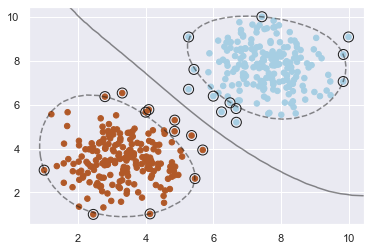

accuracy:  1.0
precision:  1.0
recall (Sensitivity):  1.0
recall (Specificity):  1.0
F1-score:  1.0
AUC:  1.0


In [12]:
model = SVC(kernel='rbf', C=0.4)
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

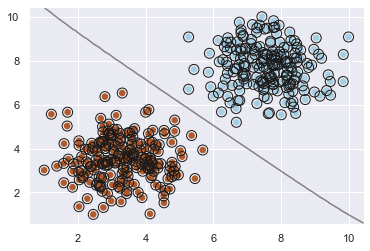

accuracy:  0.475
precision:  0.475
recall (Sensitivity):  1.0
recall (Specificity):  0.0
F1-score:  0.6440677966101694
AUC:  0.5


In [13]:
model = SVC(kernel='rbf', C=0.0005)
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

## Dataset genes

In [14]:
df = pd.read_csv('../data/genes.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

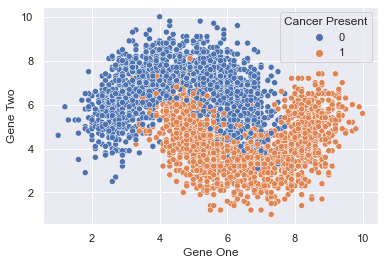

In [15]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

In [16]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

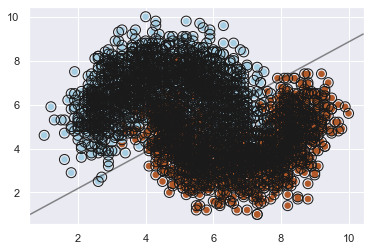

accuracy:  0.4533333333333333
precision:  0.4533333333333333
recall (Sensitivity):  1.0
recall (Specificity):  0.0
F1-score:  0.6238532110091742
AUC:  0.5


In [17]:
model = SVC(kernel='linear', C=0.000001) # 'linear', 'poly', 'rbf'
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

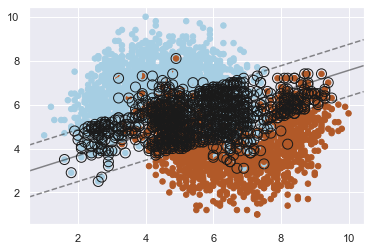

accuracy:  0.8483333333333334
precision:  0.8175438596491228
recall (Sensitivity):  0.8566176470588235
recall (Specificity):  0.8414634146341463
F1-score:  0.8366247755834829
AUC:  0.8490405308464848


In [18]:
model = SVC(kernel='linear', C=0.5) # 'linear', 'poly', 'rbf'
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

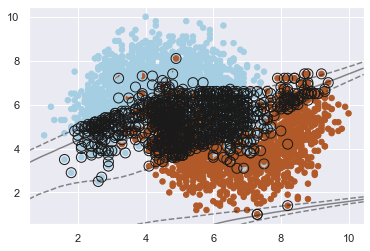

accuracy:  0.855
precision:  0.8013029315960912
recall (Sensitivity):  0.9044117647058824
recall (Specificity):  0.8140243902439024
F1-score:  0.8497409326424871
AUC:  0.8592180774748923


In [19]:
model = SVC(kernel='poly', degree=4) # 'linear', 'poly', 'rbf'
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)

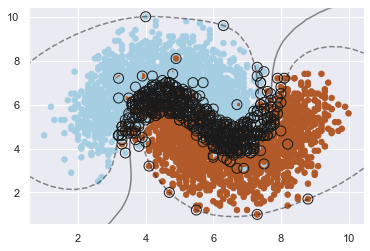

accuracy:  0.9433333333333334
precision:  0.9440298507462687
recall (Sensitivity):  0.9301470588235294
recall (Specificity):  0.9542682926829268
F1-score:  0.9370370370370371
AUC:  0.9422076757532281


In [20]:
model = SVC(kernel='rbf') # 'linear', 'poly', 'rbf'
plot_svm(model, X, y)
report_results(model, X_train, X_test, y_train, y_test)